<H1> RF </H1> <br> 
 scikit-rf  Voltage and current in a transmission line<br> 
<hr> 
<H2>Modification history </H2>
<table>
    <tr>
        <th> Modified </th>
        <th> BY </th>
        <th> Reason </th>
    </tr>
    <tr>
        <td> 30-Jun-24</td>
        <td> CBL </td>
        <td> Original </td>
    </tr>
</table>

<hr> 
<H2> References </H2> 
<a href = "https://scikit-rf.readthedocs.io/en/latest/examples/circuit/Voltages%20and%20Currents%20in%20Circuits.html"> Basic usage </a> <br> 
<a href = "https://scikit-rf.readthedocs.io/en/latest/examples/networktheory/Transmission%20Line%20Properties%20and%20Manipulations.html"> Plot current and voltage </a>
<br> 
<img src="https://scikit-rf.readthedocs.io/en/latest/_images/circuit_vi_simple_line.svg"> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import skrf as rf

In [4]:
P_f = 1  # forward power as 1 watt
Z_s = 50 # source internal impedence 
Z_L = 50 # line impedence.
L   = 10 # line length in meters
freq = rf.Frequency (2,2,1, unit='GHz')
line_media = rf.media.DefinedGammaZ0(freq, z0=Z_L) # lossless medium!
line = line_media.line(d=L, unit='m', name='Line')
V_in = np.sqrt(2*Z_s*P_f)
I_in = np.sqrt(2*P_f/Z_s)
print(f'Input voltage and current: {V_in} V and {I_in} A')

Input voltage and current: 10.0 V and 0.2 A


In [6]:
theta = rf.theta(line_media.gamma, freq.f, L)  # electrical length
V_out, I_out = rf.tlineFunctions.voltage_current_propagation(V_in, I_in, Z_L, theta)
print(f'Output voltage and current: {V_out} V and {I_out} A')

Output voltage and current: [-8.39071529+5.44021111j] V and [-0.16781431+0.10880422j] A


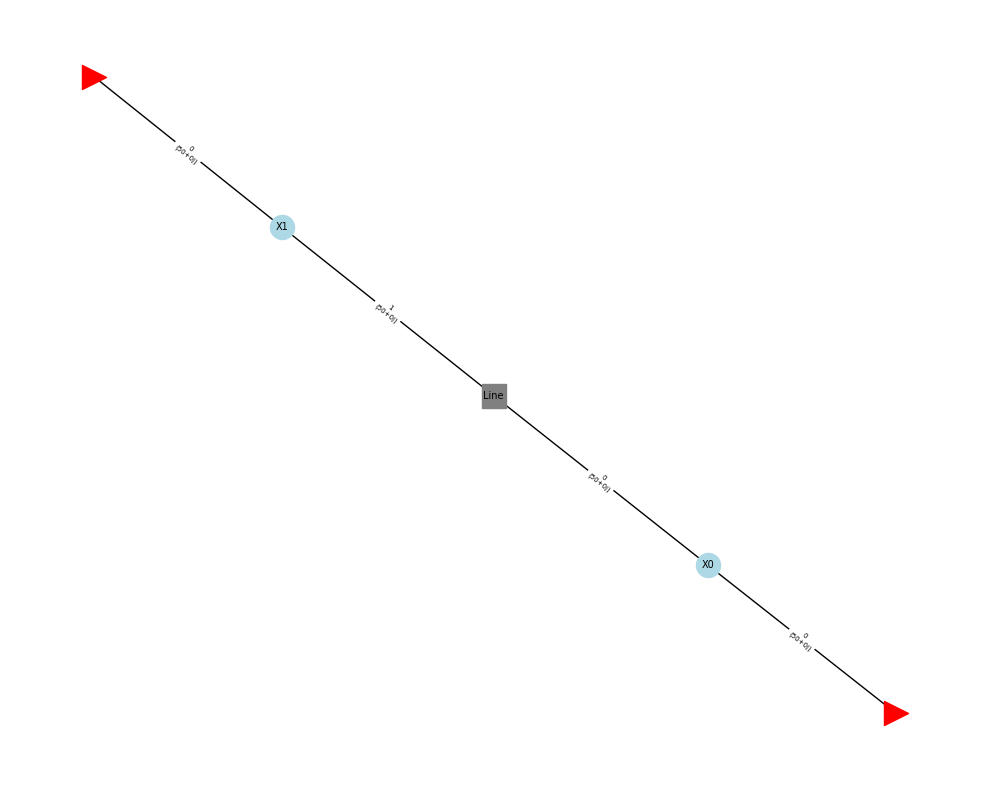

In [8]:
port1 = rf.Circuit.Port(frequency=freq, name='port1', z0=50)
port2 = rf.Circuit.Port(frequency=freq, name='port2', z0=50)
cnx = [
    [(port1, 0), (line, 0)],
    [(port2, 0), (line, 1)]
]
crt = rf.Circuit(cnx)
crt.plot_graph(network_labels=True, edge_labels=True, inter_labels=True)